# Compare semantic graphs from N different models

In [1]:
import sys
PATHS_TO_ADD = [
    "../src"
]
for p in PATHS_TO_ADD:
    if p not in sys.path:
        sys.path.append(p)

In [2]:
from linguistic_analysis.semantics.similarity import SemGraph

import os
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm

Embedding models

In [3]:
FULL_MODEL_PATH = "../models/french_novels/balzac/joint/accents_lemmatized/balzac_w2v_sg_w10_mincount5_ep/balzac_w2v_sg_w10_mincount5_ep.model"
PARTIAL_MODELS_DIR = "../models/french_novels/balzac/separate/with_accents_lemmatized"

full_model = KeyedVectors.load(FULL_MODEL_PATH)
#model = KeyedVectors.load(MODEL_PATH)
model_paths = []
models = []

for root, dirs, files in os.walk(PARTIAL_MODELS_DIR):
    for f in files:
        if f.endswith(".model"):
            model_path = os.path.join(root, f)
            print("Loading {}...".format(model_path))
            model_paths.append(model_path)
            models.append(KeyedVectors.load(model_path))


Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Pierre Grassou - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Gobseck - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Contrat de mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Une double famille - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Message - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Muse du departement - Honore de Balzac/model_w2v_s

Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Facino Cane - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Physiologie du mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Les employes ou la femme superieure - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Les proscrits - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Fausse Maitresse - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Massimilla Doni - Honor

**Key words**

1. Argent
2. Payement = paiement
3. Banque
4. Banquier
5. Crédit
6. Créancier
7. Capital
8. Dépôt
9. Prêt
10. Remboursement
11. Créance
12. Prix
13. Dette
14. Bail
15. Revenus (se pone únicamente en plural)
16. Rente
17. Francs (moneda; plural)
18. Louis d’or (moneda, plural)
19. Écus (moneda, plural)
20. Budget

In [4]:
base_words = [
    "argent",
    "payement", 
    "paiement",
    "banque",
    "banquier",
    "crédit",
    "créancier",
    "capital",
    "dépôt",
    "prêt",
    "remboursement",
    "créance",
    "prix",
    "dette",
    "bail",
    "revenu",
    "rente",
    "franc",
#    "louis d’or",
    "écus",
    "budget"
]

In [5]:
N_TOP_SIMILAR = 10
SIMILARITY_THRESHOLD = 0.4

In [6]:
full_sem_graph = SemGraph.build_from_gensim_embedding(full_model, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD)


**Calculate relative semantic distances with respect to the base semgraph (generated from an embedding trained on the whole texts)**

In [7]:
sem_graphs = []
for m in tqdm(models):
    sem_graphs.append(SemGraph.build_from_gensim_embedding(m, base_words,
                                                 n_top_similar=N_TOP_SIMILAR,
                                                 similarity_threshold=SIMILARITY_THRESHOLD))

100%|██████████| 94/94 [00:10<00:00,  8.72it/s]


In [8]:
all_graphs = [full_sem_graph]
for sg in sem_graphs:
    all_graphs.append(sg)
base_graph_names = SemGraph.get_union_of_graph_names(all_graphs)

In [9]:
len(base_graph_names)

1833

In [10]:
augmented_full_sem_graph = full_sem_graph.get_augmented_graph(base_graph_names)
augmented_sem_graphs = [sg.get_augmented_graph(base_graph_names) for sg in tqdm(sem_graphs)]

100%|██████████| 94/94 [00:41<00:00,  2.24it/s]


In [11]:
NUM_ITERATIONS = 10
DISCOUNT_FUNCTION = lambda index: 0.9
NORMALIZE = True

sem_distances = SemGraph.get_relative_semantic_distances(augmented_full_sem_graph, augmented_sem_graphs,
                                                         reset=True,
                                                         num_iterations=NUM_ITERATIONS,
                                                         discount_function=DISCOUNT_FUNCTION,
                                                         normalize=NORMALIZE)

100%|██████████| 94/94 [02:44<00:00,  1.75s/it]


In [13]:
sem_distances

[178.15565197983221,
 198.32978126641632,
 225.9339974507185,
 195.97721193450593,
 155.53543725055158,
 232.33392770750297,
 179.42286654773716,
 176.94266182596246,
 204.15205348158491,
 155.53543725055158,
 170.1129818598861,
 228.27284320588294,
 167.39841331288807,
 190.25761429934505,
 267.79322177624294,
 167.39134424803066,
 155.53543725055158,
 201.9526369627704,
 202.74274984433347,
 234.84570974872398,
 155.53543725055158,
 194.53511119691842,
 191.56893428579627,
 166.20833275910275,
 217.7682170977569,
 203.31878636270267,
 231.54035536916507,
 217.8576526956044,
 167.40207489949546,
 270.25773966566396,
 201.45234331243546,
 234.22841574982172,
 178.21396677211837,
 155.53543725055158,
 223.020673995682,
 214.9159933133422,
 239.45742347323,
 226.3128276460264,
 263.8353560990076,
 165.0153797505286,
 226.10709464852252,
 155.53543725055158,
 256.8658368799035,
 209.27774548485627,
 166.21901573170146,
 220.14895972683522,
 155.53543725055158,
 178.12615657492557,
 180.68

In [14]:
min(sem_distances)

155.53543725055158

In [15]:
max(sem_distances)

303.50456517005966

In [16]:
for i in range(len(sem_graphs)):
    print("{}:\t\t{}\n\n".format(model_paths[i], sem_distances[i]))

../models/french_novels/balzac/separate/with_accents_lemmatized/Pierre Grassou - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		178.15565197983221


../models/french_novels/balzac/separate/with_accents_lemmatized/Gobseck - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		198.32978126641632


../models/french_novels/balzac/separate/with_accents_lemmatized/Le Contrat de mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		225.9339974507185


../models/french_novels/balzac/separate/with_accents_lemmatized/Une double famille - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		195.97721193450593


../models/french_novels/balzac/separate/with_accents_lemmatized/Le Message - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model:		155.53543725055158


../models/french_novels/balzac/separate/with_accents_lemmatized/La

**Calculate matrix of distances.**

The first semgraph is the base, relative one.

In [17]:
all_semgraphs = [augmented_full_sem_graph] + augmented_sem_graphs
semantic_distance_matrix = SemGraph.get_relative_semantic_distance_matrix(all_semgraphs,
                                                                          reset=True,
                                                                          num_iterations=NUM_ITERATIONS,
                                                                          discount_function=DISCOUNT_FUNCTION,
                                                                          normalize=NORMALIZE)

100%|██████████| 95/95 [05:50<00:00,  3.69s/it]
95it [05:43,  3.61s/it]


In [18]:
#semantic_distance_matrix

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#sns.set_theme(style="whitegrid")

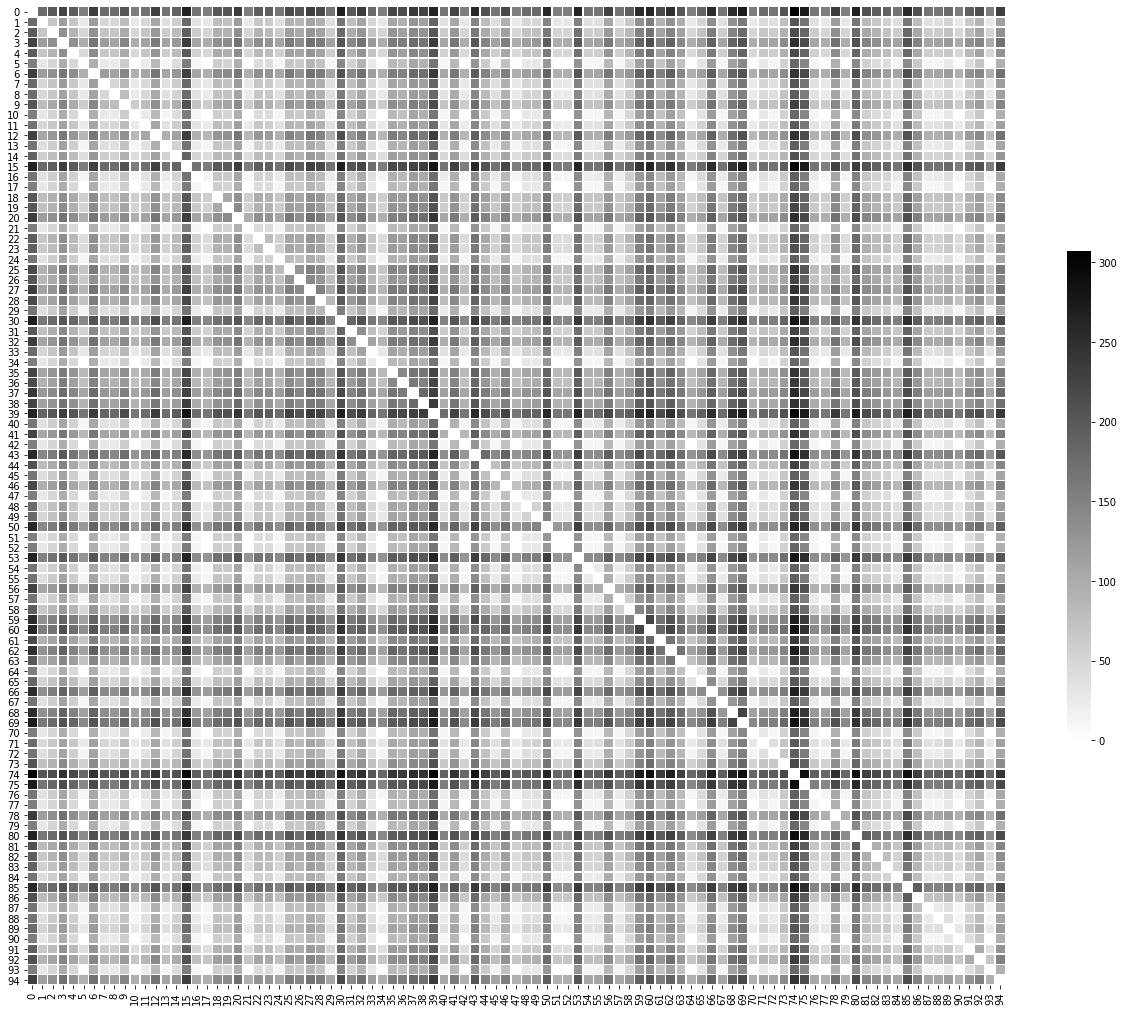

In [21]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap="coolwarm"
cmap="cool"
cmap="gray_r"


#g = sns.heatmap(semantic_distance_matrix, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
g = sns.heatmap(semantic_distance_matrix, 
                cmap=cmap, 
                square=True, 
                linewidths=.5, 
                cbar_kws={"shrink": .5}
               )

In [42]:
condensed_semantic_distance_vector = []
for i in range(1, semantic_distance_matrix.shape[0]):
    for j in range(i+1, semantic_distance_matrix.shape[0]):
        condensed_semantic_distance_vector.append(semantic_distance_matrix[i,j])

In [45]:
semantic_distance_matrix[0,:]

array([  0.        , 178.15565198, 198.32978127, 225.93399745,
       195.97721193, 155.53543725, 232.33392771, 179.42286655,
       176.94266183, 204.15205348, 155.53543725, 170.11298186,
       228.27284321, 167.39841331, 190.2576143 , 267.79322178,
       167.39134425, 155.53543725, 201.95263696, 202.74274984,
       234.84570975, 155.53543725, 194.5351112 , 191.56893429,
       166.20833276, 217.7682171 , 203.31878636, 231.54035537,
       217.8576527 , 167.4020749 , 270.25773967, 201.45234331,
       234.22841575, 178.21396677, 155.53543725, 223.020674  ,
       214.91599331, 239.45742347, 226.31282765, 263.8353561 ,
       165.01537975, 226.10709465, 155.53543725, 256.86583688,
       209.27774548, 166.21901573, 220.14895973, 155.53543725,
       178.12615657, 180.68803029, 260.22300346, 155.53543725,
       155.53543725, 262.72416219, 167.41921205, 167.39668282,
       227.06765074, 167.3978566 , 194.28138816, 253.35602087,
       260.80456348, 215.98162642, 250.47264309, 202.65

In [47]:
semantic_distance_matrix[1,:]

array([178.15565198,   0.        ,  69.06535112, 118.45880944,
        69.12128241,  27.6111197 , 118.35197558,  50.27537456,
        47.29351875,  79.97844737,  27.6111197 ,  48.93191465,
       106.10156648,  39.51598836,  59.48814103, 179.22948817,
        35.75201304,  27.6111197 ,  78.06906582,  74.58539566,
       116.38716137,  27.6111197 ,  68.90476503,  63.70426726,
        38.34627475,  93.58385297,  86.81032376, 111.51411406,
        93.80315314,  39.5450047 , 165.28813801,  75.91379537,
       108.84627679,  50.28086395,  27.6111197 , 107.4263208 ,
        93.63364537, 125.29392777, 112.90191943, 186.21676129,
        37.10780488, 104.70098974,  27.6111197 , 145.98583792,
        81.35662073,  40.61263583,  95.05854182,  27.6111197 ,
        50.30478667,  48.89137598, 143.29804494,  27.6111197 ,
        27.6111197 , 150.01904826,  38.38086683,  39.51437901,
       105.80086753,  35.75274493,  66.25945674, 132.24806155,
       152.94617511,  92.35744819, 130.94787405,  97.89

In [43]:
#max(condensed_semantic_distance_vector)

**Hierarchical clustering**

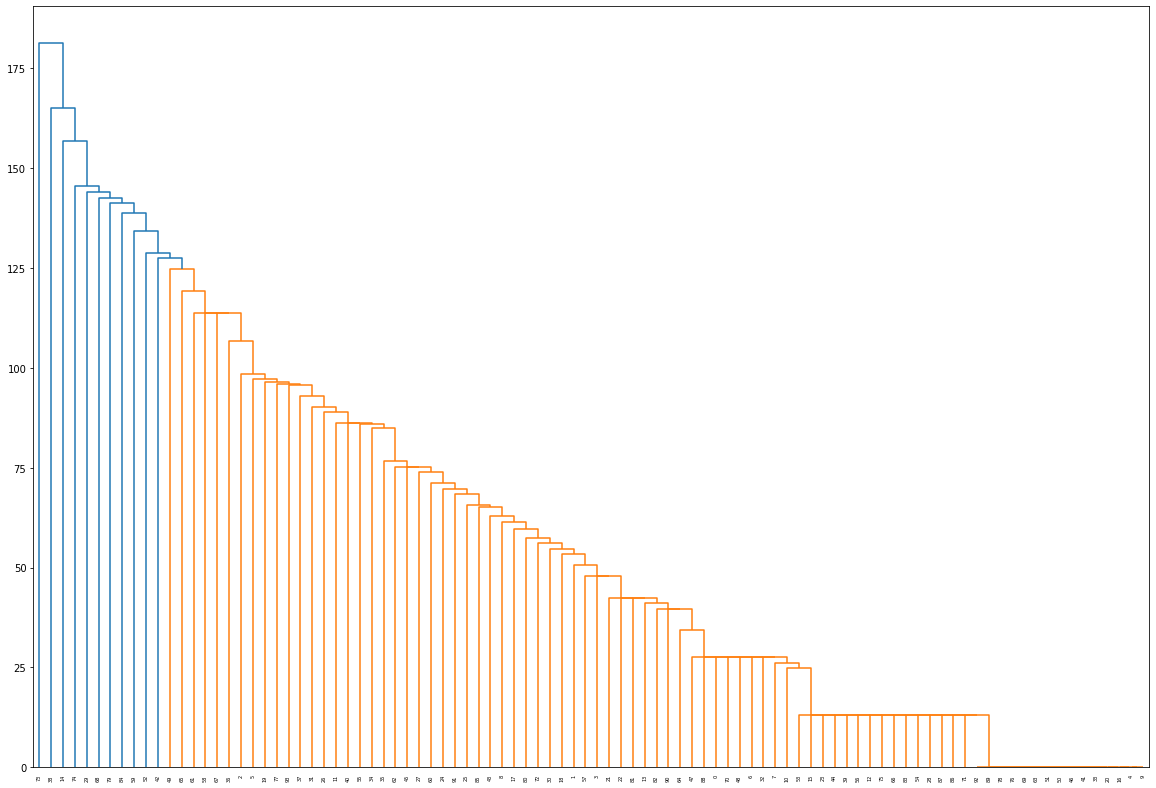

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(condensed_semantic_distance_vector, 'single', optimal_ordering=False)

#labelList = range(1, 11)

plt.figure(figsize=(20, 14))
dendrogram(linked,
            orientation='top',
#            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [27]:
?linkage

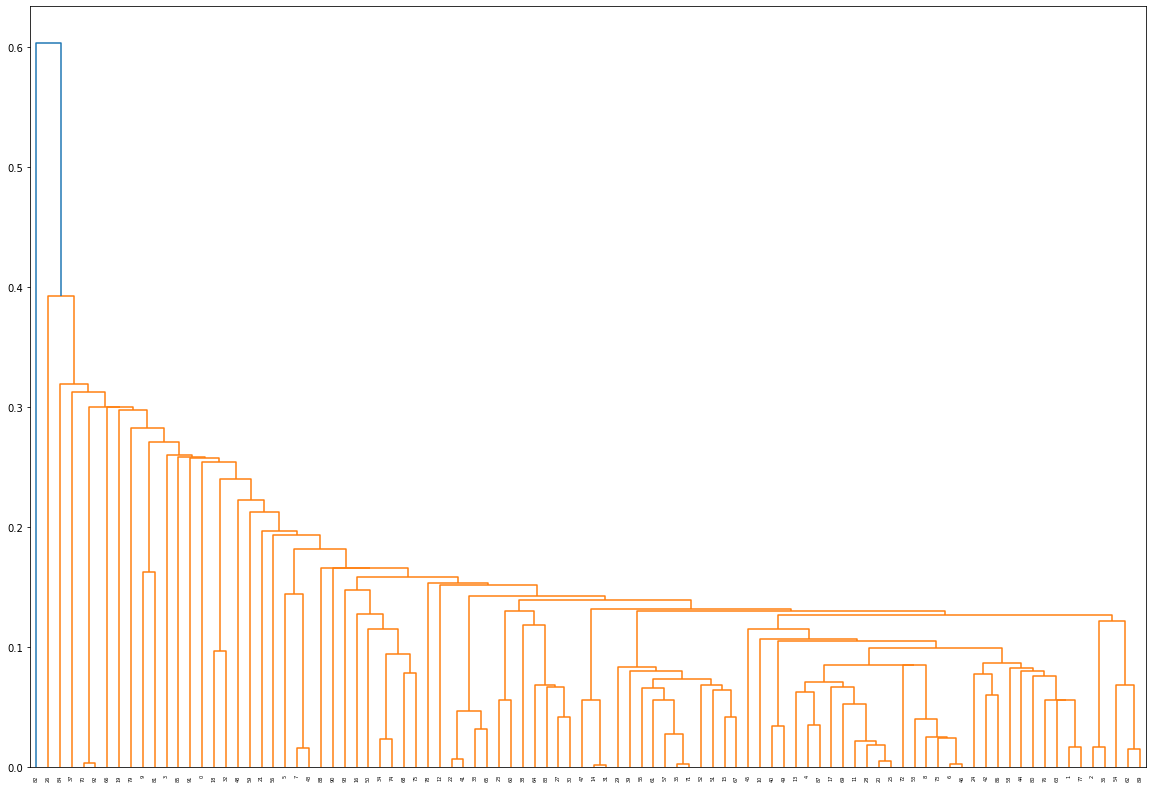

In [48]:
import numpy as np

linked = linkage(np.random.exponential(10, len(condensed_semantic_distance_vector)), 'single', optimal_ordering=False)

#labelList = range(1, 11)

plt.figure(figsize=(20, 14))
dendrogram(linked,
            orientation='top',
#            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()